## 3. Distribuciones de probabilidad continuas

1. Suponga que el error en la temperatura en un experimento controlado de laboratorio es una variable aleatoria continua X, que tiene la siguiente función de densidad de probabilidad:

\begin{equation}
f(x) = \left \{ \begin{aligned} \frac{x^2}{3} &\ (-1 \leq x \leq 2) \\ 0 \ &(\text{en otro caso})
\end{aligned} 
\right .
\end{equation}

Encuentre las probabilidades:

a) P(0 < X $\leq$ 1)\
b) P(1 < X $\leq$ 2)

In [8]:
from scipy.integrate import quad

def f(x):
    return x**2/3

#a) Se obtiene la probabilidad según la distribución continua de probabilidad
#con la integral apropiada

print("La probabilidad de P(0 < X <= 1)  es de", round(quad(f, 0, 1)[0],3))

#b) Se obtiene la probabilidad de la misma manera que en el literal a

print("La probabilidad de P(1 < X <= 2)  es de", round(quad(f, 1, 2)[0],3))

La probabilidad de P(0 < X <= 1)  es de 0.111
La probabilidad de P(1 < X <= 2)  es de 0.778


2. Se supone que las calificaciones de un examen están normalmente distribuidas con media 78 y varianza
de 36.

a) ¿Cuál es la probabilidad de que una persona que haga el examen alcance  calificaciones mayores de 72?

b) Suponga que los estudiantes que alcancen el 10% más alto de esta distribución reciben una calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una calificación de A?

c) ¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar a sólo 28,1 % más alto de todas las calificaciones?

d) Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25 % más bajo?

e) Si se sabe que la calificación de un estudiante excede de 72, ¿cuál es la probabilidad de que su calificación exceda de 84?


In [18]:
import numpy as np
from scipy.stats import norm

#Se generan datos para la distribución normal acorde a la media y varianza 
#especificadas en el ejercicio
mu = 78
sigma = 36
N = 10000
x = np.random.normal(mu,sigma,N)

#a) 
conteo = 0 
for i in x:
    if i > 72:
        conteo +=1
print("a) Probabilidad puntaje > 72 =", round(conteo/N, 3))

#b) Se calcula el valor en el cual se obtiene el 90% de la distribución
#que a su vez es el mínimo dato del percentil-10 más alto
print("b) Nota mínima percentil-10 más alto =", round(norm.ppf(0.90,mu,sigma), 2))

#c)
print("c) Punto límite 28.1% más alto =", round(norm.ppf(1-0.281,mu,sigma), 2))

#d)
limite = norm.ppf(0.25,mu,sigma)
conteo = 0 
for i in x:
    if i >= limite + 5:
        conteo +=1
print("d) Proporción >=",round(limite+5,3),"=", round(conteo/N, 3))

#e) Se toma la probabilidad de que se obtenga un puntaje mayor de 72, tomando
#esta probabilidad como el máximo de proporción, se calcula la distribución de
#la probabilidad de que el puntaje sea mayor a 84
conteo = 0 
for i in x:
    if i > 72:
        conteo +=1
rango = conteo/N
conteo = 0 
for i in x:
    if i > 84:
        conteo +=1
proporcionInicial = conteo/N
print("e) Probabilidad puntaje > 84 si se sabe puntaje > 72 =", round(proporcionInicial/rango,3))

a) Probabilidad puntaje > 72 = 0.569
b) Nota mínima percentil-10 más alto = 124.14
c) Punto límite 28.1% más alto = 98.88
d) Proporción >= 58.718 = 0.704
e) Probabilidad puntaje > 84 si se sabe puntaje > 72 = 0.757


## 4. Cadenas de Markov

Las bases nitrogenadas fundamentales que componen el ADN son: Adenina (A), Citosina (C), Guanina (G) y Timina (T). Un gen se puede representar a través de una secuencia ordenada de dichas bases. Suponga la siguiente matriz de transición entre bases:

\begin{equation}
\mathbb{T} = \left(
\begin{matrix}
 & A & C & G & T\\
A & 0,4 & 0,25 & 0,3 & 0,1\\
C & 0,2 & 0,25 & 0,3 & 0,1\\
G & 0,2 & 0,25 & 0,1 & 0,1\\
T & 0,2 & 0,25 & 0,3 & 0,7
\end{matrix}
\right)
\end{equation}

La probabilidad a priori está dada por $\pi$ = [0,25, 0, 0,5, 0,25].
1. Encuentre la probabilidad de obtener el gen $g$ = [T, G, C, T, C, A, A, A].
2. Estas bases nitrogenadas pasarán por un proceso de traducción donde el objetivo es que se traduzcan A − U, C − G, G − C, T − A según la siguiente matriz de emisión

\begin{equation}
\mathbb{E} = \left(
\begin{matrix}
 & A & C & G & T\\
U & 0,8 & 0 & 0 & 0,2\\
C & 0,05 & 0,9 & 0,1 & 0,1\\
G & 0,05 & 0,1 & 0,9 & 0\\
A & 0,1 & 0 & 0 & 0,7
\end{matrix}
\right)
\end{equation}

Si un gen traducido está dado por $g_{T}$ = [A, C, G, A, G, U, U, U], ¿cuál es la probabilidad de que venga del gen $g$ anterior?


Literal a
[1. 1. 1. 1.] El estado inicial se cumple
Gen: TGCTCAAA
Estado actual: T - 0.25
Estado actual: TG - 0.03125
Estado actual: TGC - 0.0058203125
Estado actual: TGCT - 0.0025089184570312503
Estado actual: TGCTC - 0.0004549061181106569
Estado actual: TGCTCA - 0.00010268432322225664
Estado actual: TGCTCAA - 2.3077076652314995e-05
Estado actual: TGCTCAAA - 5.175719621125102e-06
Probabilidad Final: 5.18e-06


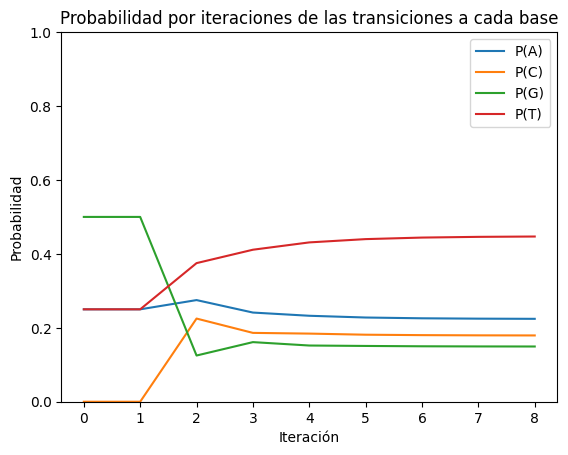

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#a)
print('Literal a')
#Se definen las posiciones para el alfabeto acorde a la situación planteada
abc = {'A':0,'C':1,'G':2,'T':3}

T = np.array([[0.4,0.25,0.30,0.10],\
              [0.2,0.25,0.30,0.10],\
              [0.2,0.25,0.10,0.10],\
              [0.2,0.25,0.30,0.70],\
             ])

#Comprobamos que se cumpla la condición base para Markov (todas las columnas
#deben dar una suma de 1)
print(np.sum(T,axis=0), "El estado inicial se cumple")

initial = np.array([0.25,0.,0.5,0.25])

#Delimitamos el número de transiciones, en este caso serán 8 para obtener
#el gen de 8 bases g = TGCTCAAA
g = 'TGCTCAAA'
print('Gen:', g)
probabilidad = 1
genActual = ""
estados = np.array(initial)
for base in g:
    pos = abc[base]
    probabilidad *= initial[pos]
    genActual += base
    estados = np.vstack((estados,initial))
    print("Estado actual:",genActual,"-", probabilidad)
    initial = np.dot(T,initial)
#Respuesta final
print("Probabilidad Final:", round(probabilidad,8))

plt.figure()
for i in range(estados.shape[1]):
    plt.plot(estados[:,i])
plt.title("Probabilidad por iteraciones de las transiciones a cada base")
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')
plt.ylim((0,1))
plt.legend(['P(A)','P(C)','P(G)','P(T)'])
plt.show()

Literal b
[1. 1. 1. 1.] El estado inicial se cumple
Gen Traducido: ACGAGUUU
Estado actual: A - 0.25
Estado actual: AC - 0.115625
Estado actual: ACG - 0.018210937500000003
Estado actual: ACGA - 0.0025404257812500003
Estado actual: ACGAG - 0.0006603836818359376
Estado actual: ACGAGU - 0.00012570403383747075
Estado actual: ACGAGUU - 2.177935519864635e-05
Estado actual: ACGAGUUU - 3.421525812029743e-06
Probabilidad Final: 3.42e-06


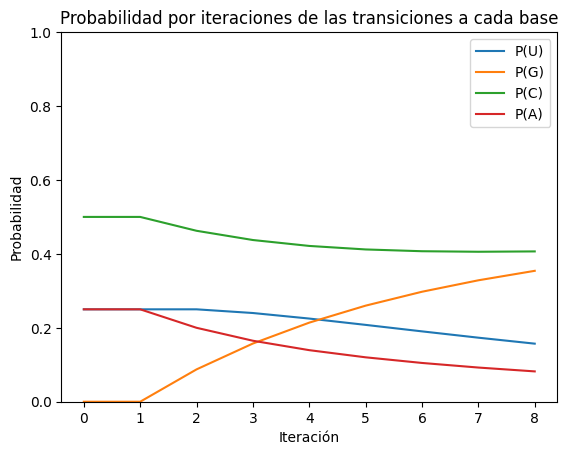

In [17]:
#a)
print('Literal b')
#Se definen las posiciones para el alfabeto acorde a la situación planteada
abc = {'U':0,'G':1,'C':2,'A':3}

T = np.array([[0.80,0.00,0.00,0.20],\
              [0.05,0.90,0.10,0.10],\
              [0.05,0.10,0.90,0.00],\
              [0.10,0.00,0.00,0.70],\
             ])

#Comprobamos que se cumpla la condición base para Markov (todas las columnas
#deben dar una suma de 1)
print(np.sum(T,axis=0), "El estado inicial se cumple")

initial = np.array([0.25,0.,0.5,0.25])

#Delimitamos el número de transiciones, en este caso serán 8 para obtener
#el gen de 8 bases g = TGCTCAAA
g = 'ACGAGUUU'
print('Gen Traducido:', g)
probabilidad = 1
genTraducidoActual = ""
estados = np.array(initial)
for base in g:
    pos = abc[base]
    probabilidad *= initial[pos]
    genTraducidoActual += base
    estados = np.vstack((estados,initial))
    print("Estado actual:",genTraducidoActual,"-", probabilidad)
    initial = np.dot(T,initial)
#Respuesta final
print("Probabilidad Final:", round(probabilidad,8))

plt.figure()
for i in range(estados.shape[1]):
    plt.plot(estados[:,i])
plt.title("Probabilidad por iteraciones de las transiciones a cada base")
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')
plt.ylim((0,1))
plt.legend(['P(U)','P(G)','P(C)','P(A)'])
plt.show()